# region_interface_areas

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

Calculates the interfacial area between all pairs of adjecent regions.

Create input image and variables:

In [2]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
r = ps.filters.snow_partitioning(im, dt=None, r_max=4, sigma=0.4, return_all=True,
                      mask=True, randomize=True)
regions = r.regions
areas = ps.metrics.region_surface_areas(regions,voxel_size=1, strel=None)
voxel_size=1
strel=None

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  81
Peaks after trimming saddle points:  79
Peaks after trimming nearby peaks:  73
------------------------------------------------------------
Finding surface area of each region
100%|██████████| 73/73 [00:00<00:00, 740.12it/s]


Apply metric filter:

In [3]:
x = ps.metrics.region_interface_areas(regions, areas, voxel_size, strel)

------------------------------------------------------------
Finding interfacial areas between each region
100%|██████████| 73/73 [00:00<00:00, 354.87it/s]


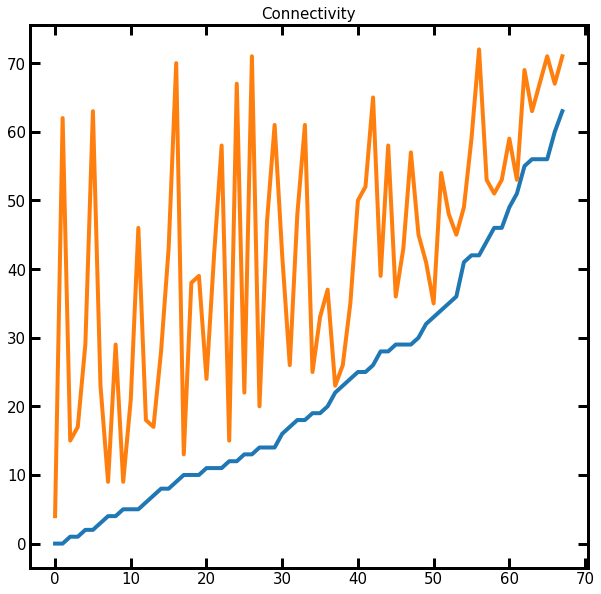

In [4]:
plt.figure(figsize=[10, 10])
plt.title('Connectivity')
plt.plot(x.conns)
plt.show()

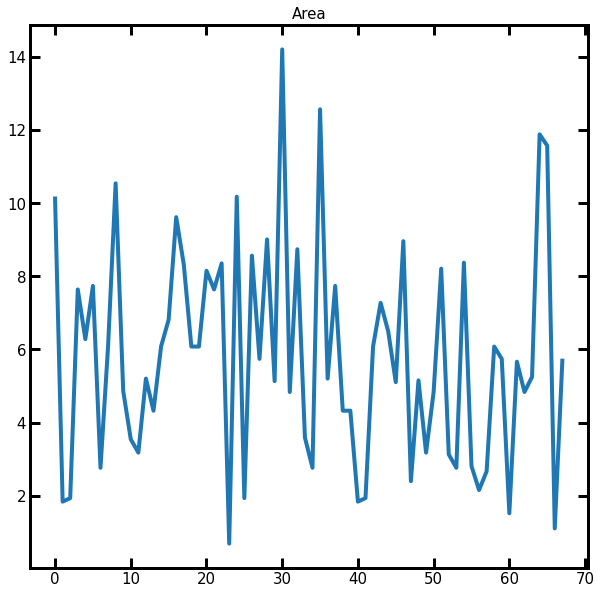

In [5]:
plt.figure(figsize=[10, 10])
plt.title('Area')
plt.plot(x.area)
plt.show()